In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Loading Data

In [33]:
df = pd.read_csv('fetal_health.csv')

In [ ]:
df.head()

The dataset contains 2126 records of features extracted from Cardiotocogram exams, which werethen classified into 3 classes:'Normal', 'Suspect' and 'Pathological' which were encoded  as '1', '2' and '3' respectively.

In [34]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [35]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Data Analysis and Visualization

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [37]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [38]:
df.columns[df.isna().any()]

Index([], dtype='object')

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

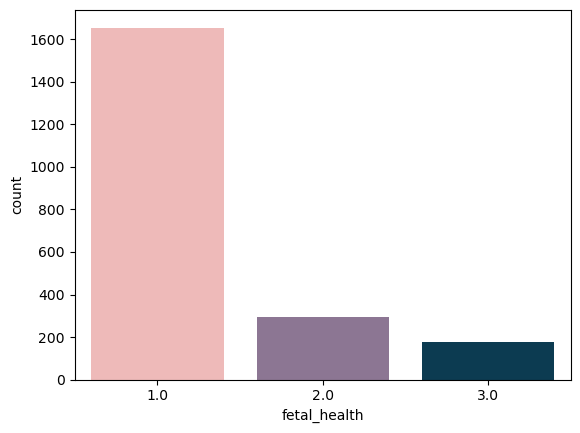

In [39]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data = df, x = 'fetal_health', palette = colours)

In [40]:
df.fetal_health.value_counts()/len(df)*100

1.0    77.845720
2.0    13.875823
3.0     8.278457
Name: fetal_health, dtype: float64

([<matplotlib.patches.Wedge at 0x2a761751220>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.3460397647298661, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

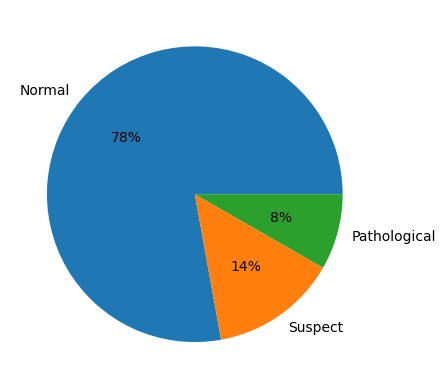

In [97]:
plt.pie(df.fetal_health.value_counts()/len(df), labels=['Normal', 'Suspect', 'Pathological'], autopct='%.0f%%')

77.85% of fetal are categorised as 'normal', 13.87% of fetal are categorised as 'Suspect' and 8.28% are categorised as 'Pathological'.

<AxesSubplot:>

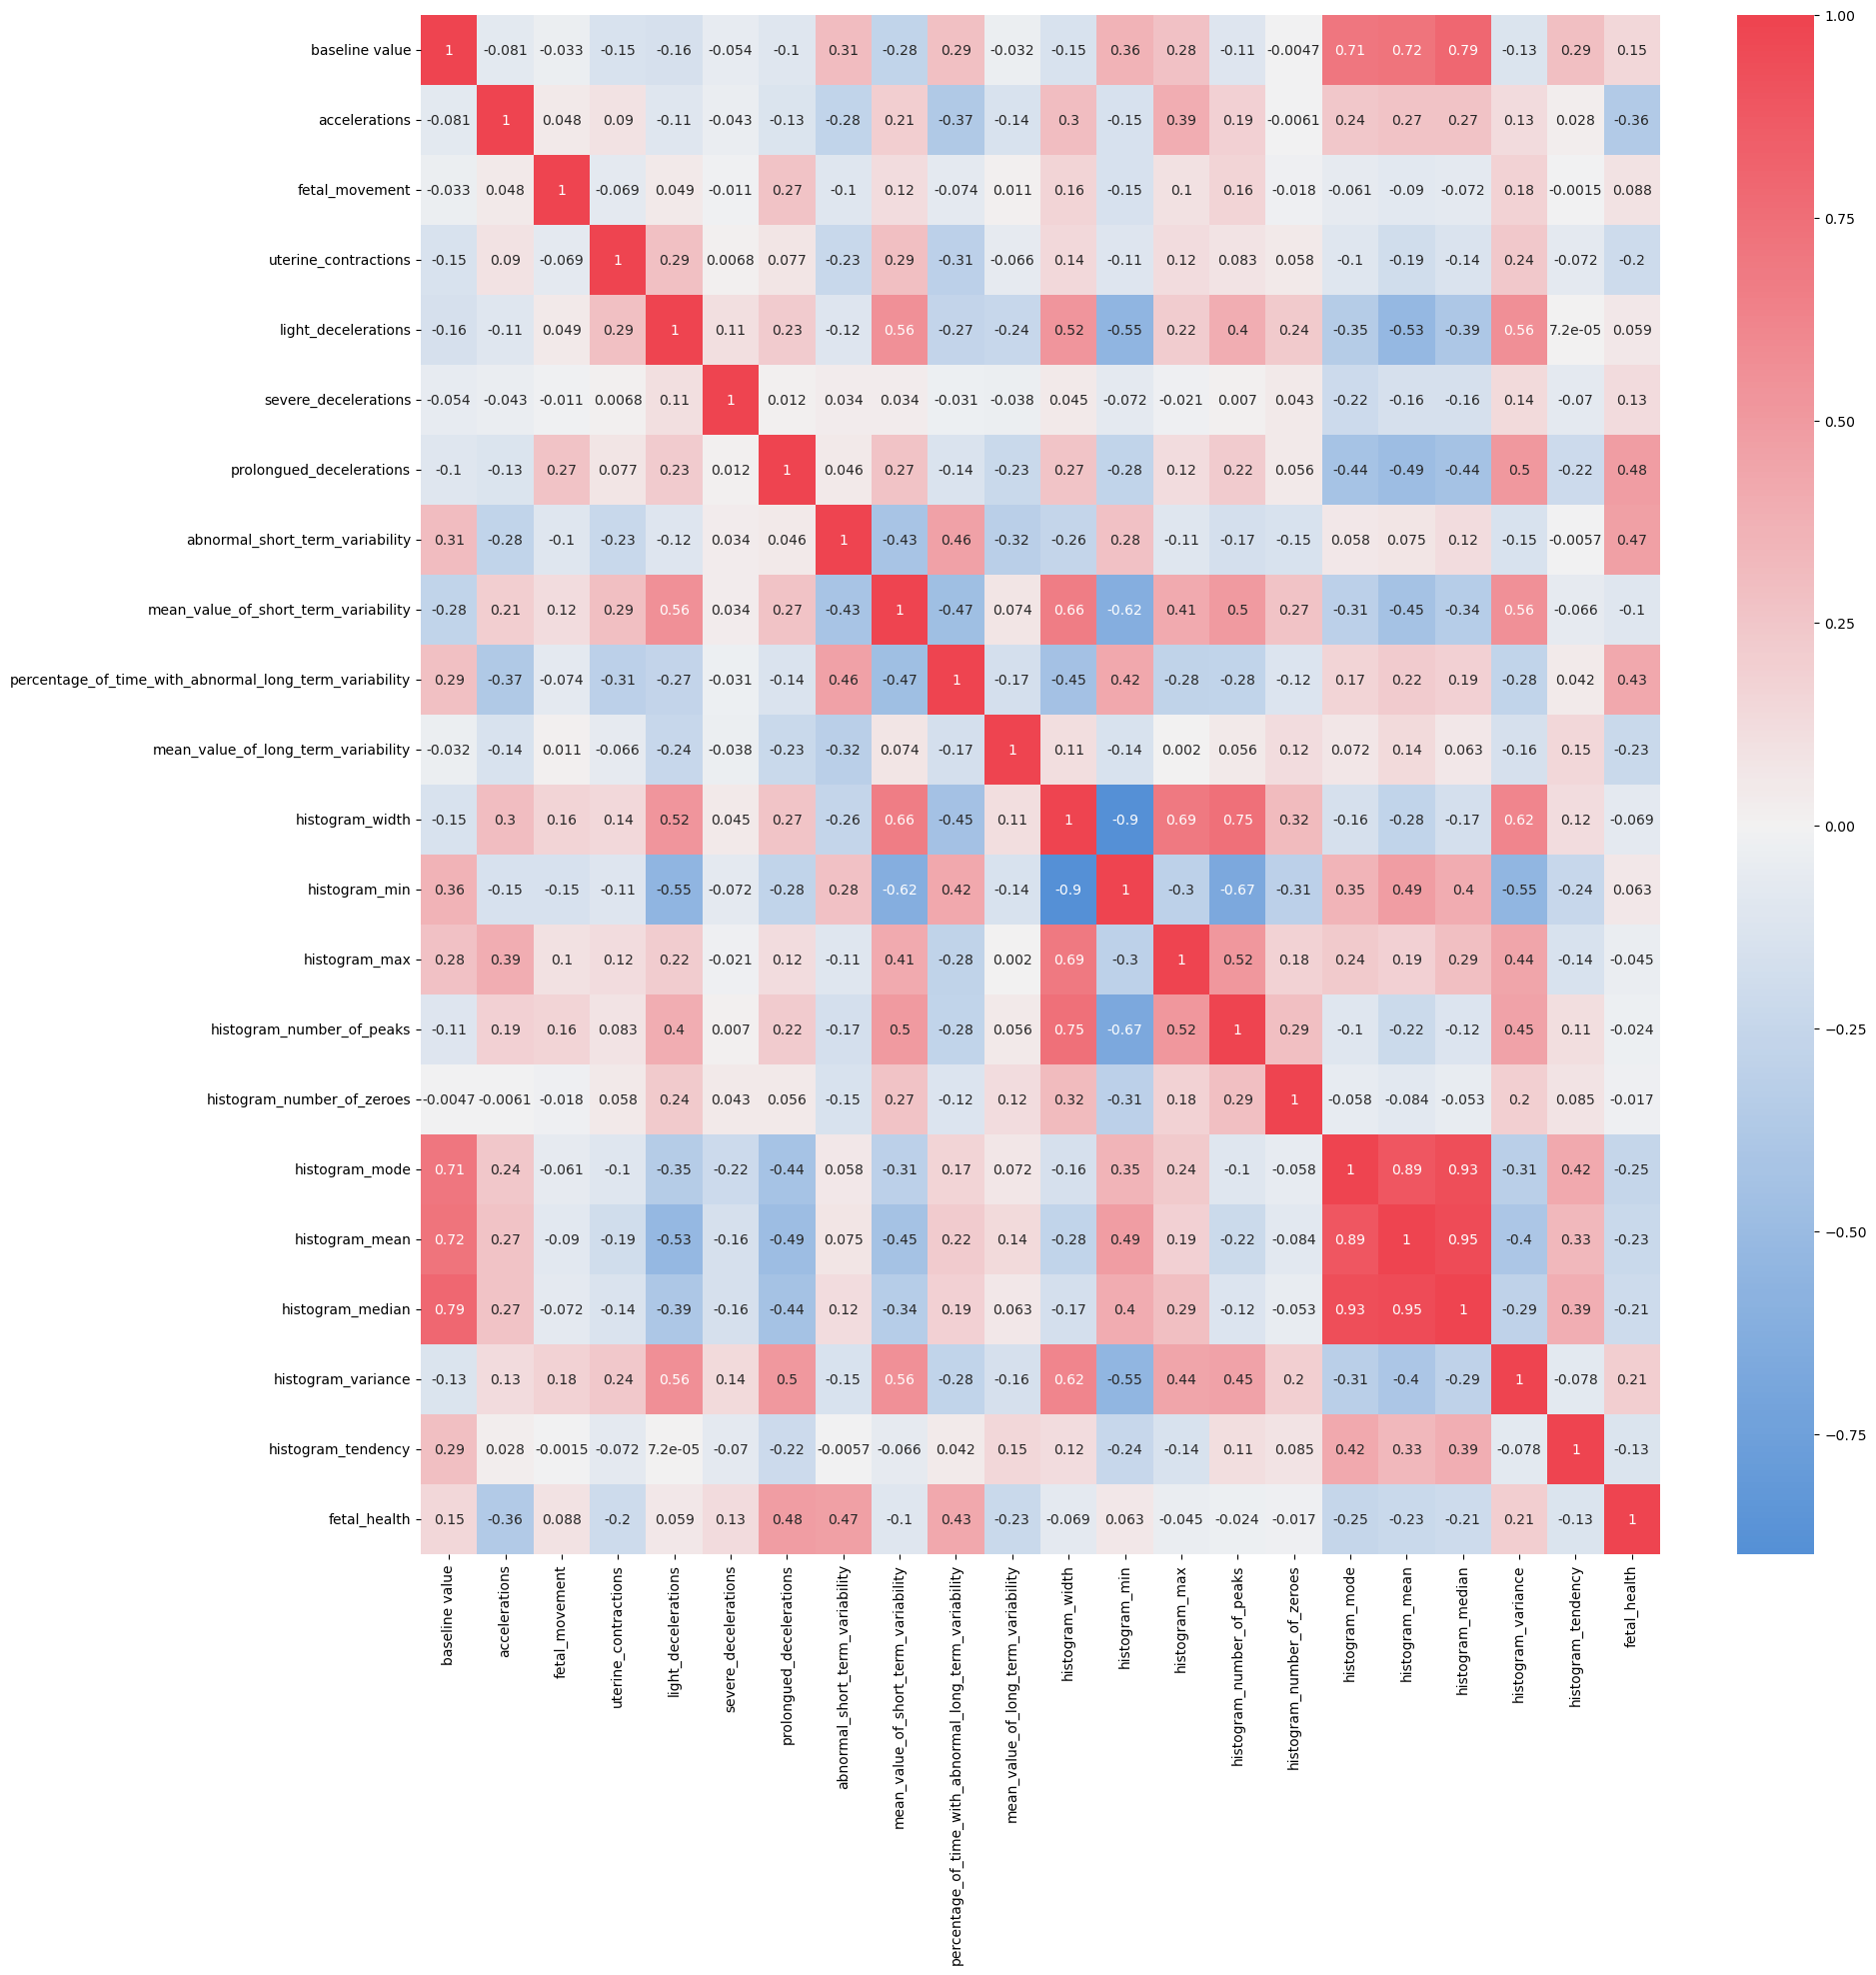

In [41]:
coormat = df.corr()
plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(250, 10, s = 80, l = 55, n=9,as_cmap=True)

sns.heatmap(coormat, annot=True, cmap = cmap, center = 0)

In [110]:
Num_feature = coormat["fetal_health"].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


"prolongued_decelerations", "abnormal_short_term_variability", "mean_value_of_long_term_variability" and  "percentage_of_time_with_abnormal_long_term_variability" have high correlation to fetal_health are the most important features. These features should be further explored for a more clearer picture.


"histogram_number_of_zeroes", "histogram_number_of_peaks" and "histogram_max", "histogram_width" shows correlation less than the 0.1.These features can be dropped before feeding into the model.

In [42]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Accelerations Vs Fetal Movement by Fetal Health

C:\Users\sykua\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


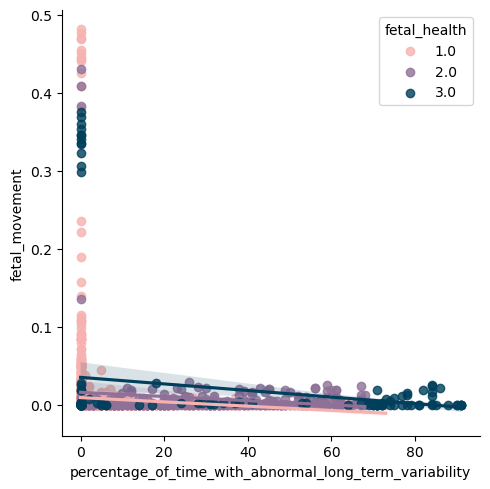

In [111]:
sns.lmplot(data = df, x = 'percentage_of_time_with_abnormal_long_term_variability', y='fetal_movement', palette=colours, hue= 'fetal_health', legend_out = False)
plt.show()

Prolongued Decelerations Vs Fetal Movement by Fetal Health

C:\Users\sykua\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


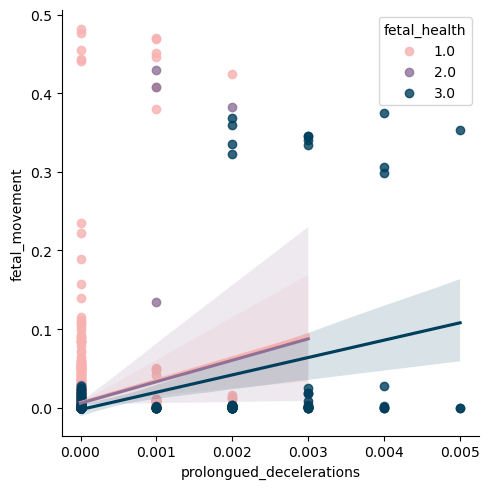

In [44]:
sns.lmplot(data = df, x='prolongued_decelerations', y = 'fetal_movement', palette=colours, hue='fetal_health', legend_out  =False)
plt.show()

Abnormal Short Term Variability Vs Fetal Movement by Fetal Health

C:\Users\sykua\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


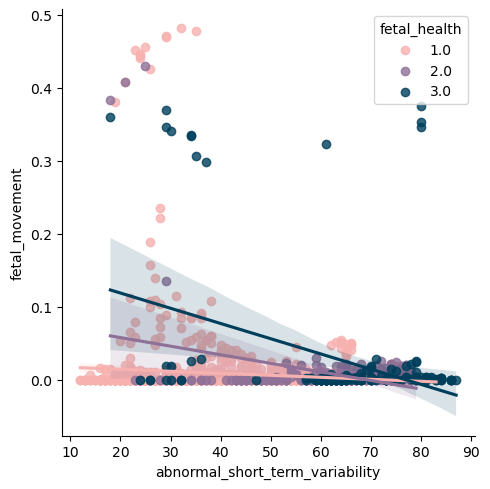

In [45]:
sns.lmplot(data = df, x='abnormal_short_term_variability', y = 'fetal_movement', palette=colours, hue='fetal_health', legend_out  =False)
plt.show()

Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health

C:\Users\sykua\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


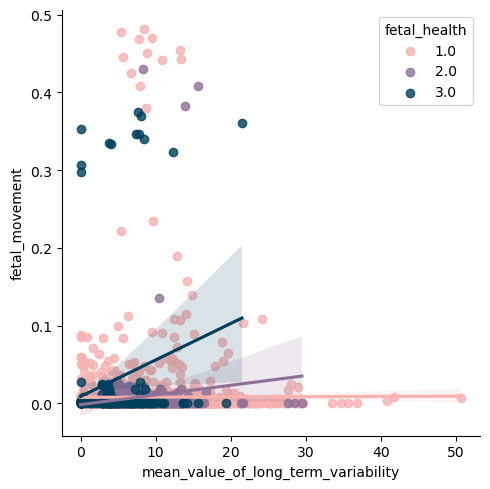

In [112]:
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

The rates of change for all the features shows consistent trend except for "accelerations" feature. 
There are also outliers in the features that can be further explored.

In [48]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

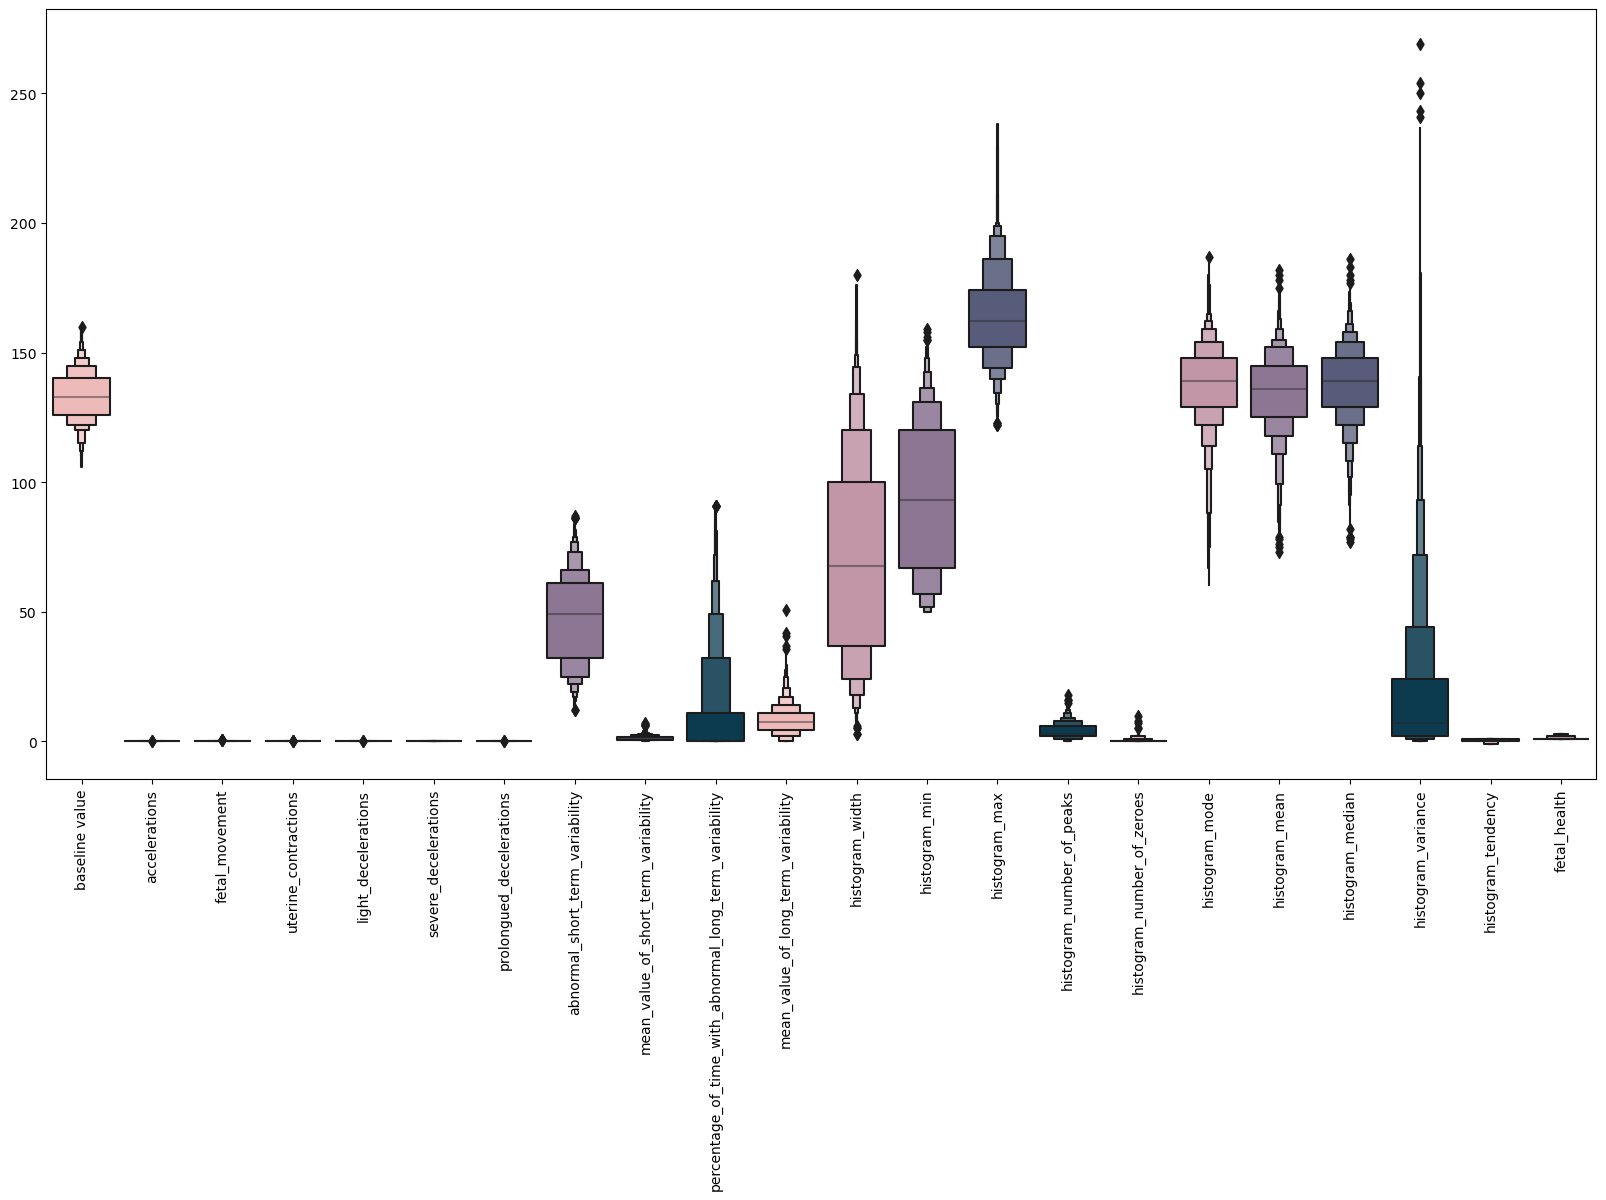

In [51]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

There are outliers in the dataset. But the outlier won't be removed yet as it may lead to overfitting. 

It is a CTG report so it is very unlikely is is human error.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] which is what we are going to do for our next step.

# Scaling the Data

In [52]:
X = df.drop('fetal_health', axis = 1)
y = df.fetal_health

col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns = col_names)

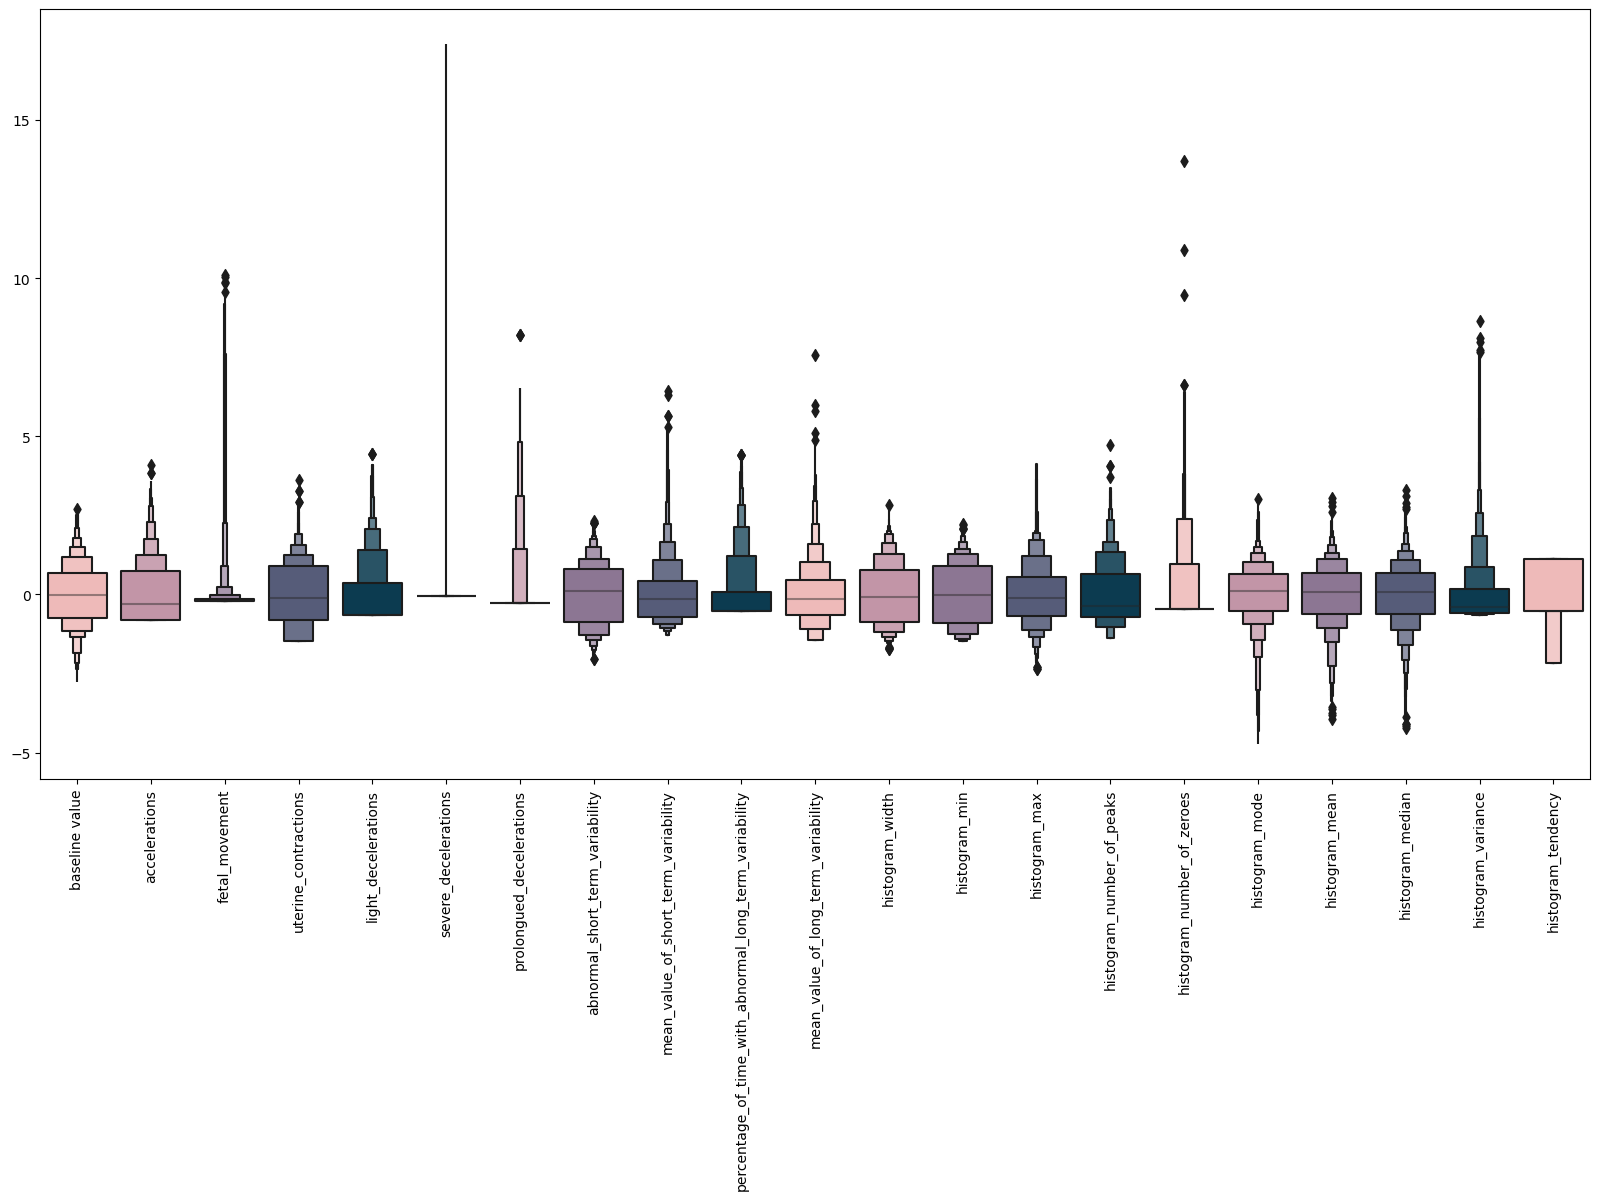

In [53]:
plt.figure(figsize = (20,10))
sns.boxenplot(data = X_df, palette = shades)
plt.xticks(rotation = 90)
plt.show()

The plot clearly indicates that all the features are in same range since we have scaled the data.


Outliers can be spotted in certain features, which we have to make a call whether to take it along or drop it off.


Assuming outliers aren't cause of the typo or measurement error (human error) we aren't taking it down to avoid the overfitting of the model as well as the loss of information. 


# Model Building

# Split Train and Test Set

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 42)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

# Model Selection

In [118]:
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state =42))])

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])

pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

pipeline_svc = Pipeline([('sv_classifier', SVC())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_gbcl]

pipe_dict = {0:'Logistic Regression', 1: 'Decision Tree', 2:'RandomForest', 3:'SVC', 4:'GradientBoost'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_accuracy = []

for i, model in enumerate (pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv = 10)
    cv_results_accuracy.append(cv_score)
    print('%s: %f'%(pipe_dict[i], cv_score.mean()))

C:\Users\sykua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.895882
Decision Tree: 0.912353
RandomForest: 0.938824
SVC: 0.912353
GradientBoost: 0.945294


Gradient Boost and Random Forest are the top two models performs best with our data and we will further explore the two models.

# Grid Search CV

# Random Forest Classifier

In [119]:
parameters = {'n_estimators':[100,150,200,700],
             'max_features':['auto','sqrt', 'log2'],
              'max_depth': [4,8,12,16],
              'criterion':['gini', 'entropy'],
              'n_jobs':[-1,1,None]
             }

CV_rfc = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, cv = 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'log2',
 'n_estimators': 700,
 'n_jobs': None}

In [120]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)

predictions = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9530516431924883

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.91      0.80      0.85        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.93      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



<AxesSubplot:>

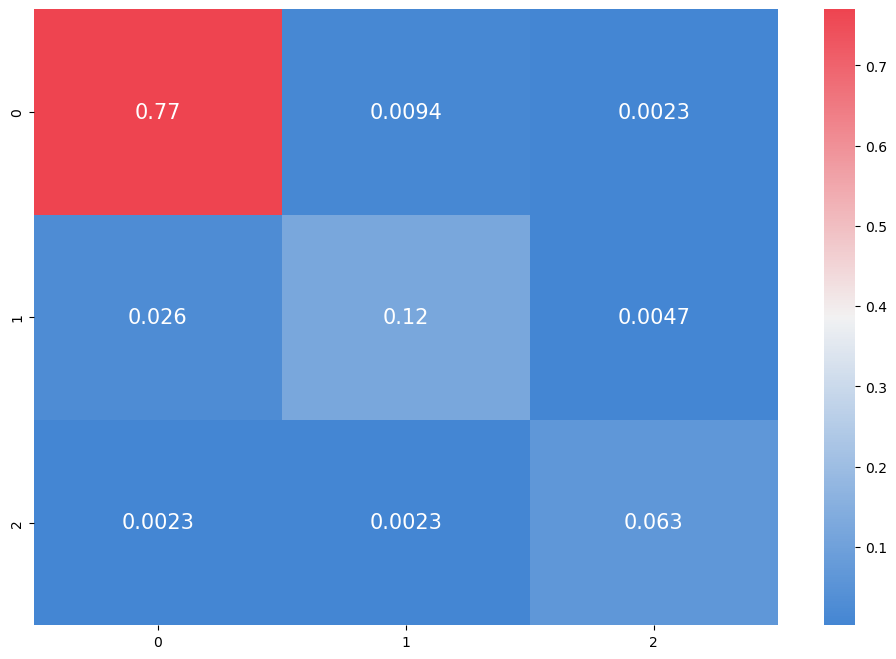

In [122]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# Gradient Boosting Classifier

In [123]:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score: 0.95


In [124]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [125]:
CV_gbc = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters, cv = 5, verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True)
CV_gbc.fit(X_train, y_train)

CV_gbc.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'learning_rate': 0.75,
 'loss': 'deviance',
 'max_depth': 8,
 'n_estimators': 750}

In [126]:
GB_model = GradientBoostingClassifier(**CV_gbc.best_params_)
GB_model.fit(X_train, y_train)

predictions = GB_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9577464788732394

In [127]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       333
         2.0       0.89      0.86      0.87        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.96       426
   macro avg       0.93      0.92      0.93       426
weighted avg       0.96      0.96      0.96       426



<AxesSubplot:>

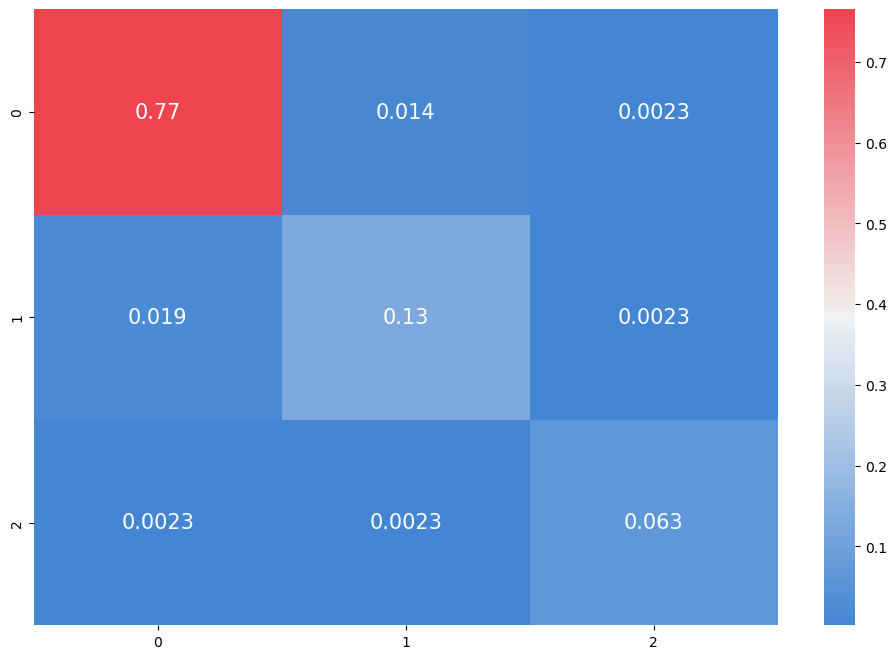

In [128]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})